In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def CrankNicolson(t, x, r_0, r_L, T_0):
    dx = x[1] - x[0]
    dt = t[1] - t[0]
    
    u = np.zeros((t.size, x.size))
    u[0, :] = T_0(x)
    
    Ai = - dt / (2 * dx ** 2)
    Bi = 1 + dt / dx ** 2
    Ci = Ai
    
    alpha = np.zeros(x.size - 1)
    beta = np.zeros_like(alpha)
    
    for t_i in range(t.size - 1):
        alpha[0] = 0
        beta[0] = r_0(t[t_i + 1])
        for i in range(1, x.size - 1):
            f = u[t_i, i] + (dt / (2 * dx ** 2)) * (u[t_i, i + 1] - 2 * u[t_i, i] + u[t_i, i - 1])
            alpha[i] = -Ci / (Bi + Ai * alpha[i - 1])
            beta[i] = (f - Ai * beta[i - 1]) / (Bi + Ai * alpha[i - 1])
        u[t_i + 1, x.size - 1] = r_L(t[t_i + 1])
        for i in range(x.size - 2, -1, -1):
            u[t_i + 1, i] = alpha[i] * u[t_i + 1, i + 1] + beta[i]
    return u

In [14]:
N, M = 10, 10
L, T = 1, 1
t = np.linspace(0, T, M)
x = np.linspace(0, L, N)
r_0 = lambda r: 0
r_L = lambda r: 0
T_0 = lambda x: x * ((1 - x / L) ** 2)

In [15]:
solution = CrankNicolson(t, x, r_0, r_L, T_0)

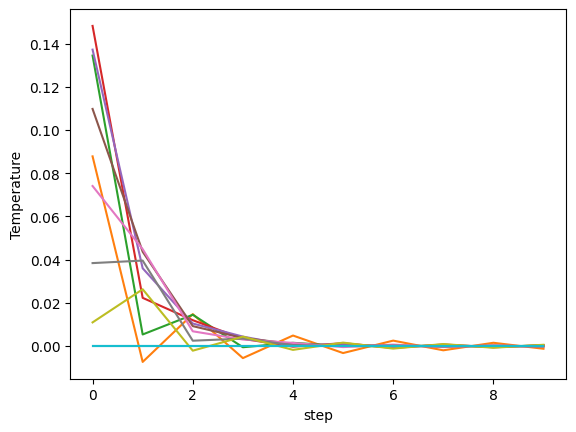

In [17]:
fig, ax = plt.subplots()
ax.plot(solution)
plt.xlabel('step')
plt.ylabel('Temperature')
plt.show()